<a href="https://colab.research.google.com/github/jojosam90/AWS-Sagemaker-Deploy/blob/master/json_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import json
with open('/content/sample_data/via_project.json', 'r') as f:
  data = json.load(f)

print(data)

{'1_0_1184.png': {'fileref': '', 'size': 6412952, 'filename': '1_0_1184.png', 'base64_img_data': '', 'file_attributes': {}, 'regions': {'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [2949.4801675289477, 2955.9472776545945, 2957.7950234047794, 2963.3382606553337, 2970.729243656073, 2976.272480906627, 2978.1202266568116, 2982.739591032274, 2984.5873367824584, 2988.282828282828, 2992.90219265829, 2998.4454299088443, 3002.1409214092137, 3004.912540034491, 3010.4557772850453, 3013.2273959103227, 3011.3796501601378, 3003.064794284306, 2994.749938408475, 2979.044099531904, 2965.1860064055186, 2947.632421778763, 2949.4801675289477], 'all_points_y': [1680.5247597930525, 1677.7531411677753, 1672.209903917221, 1668.5144124168514, 1663.8950480413894, 1659.2756836659275, 1652.8085735402808, 1649.1130820399112, 1652.8085735402808, 1656.5040650406504, 1658.351810790835, 1658.351810790835, 1658.351810790835, 1665.7427937915743, 1668.5144124168514, 1672.209903917221, 1680.5247597930525,

In [23]:
annotations = list(data.values())

In [25]:
annotations = [a for a in annotations if a['regions']]

In [32]:
for a in annotations:
  polygons = [a['regions']['0']['shape_attributes']]
  objects = [a['regions']['0']['region_attributes']['label']]
  print("objects", objects)
  name_dict = {'chip': 1, 'crack': 2}
  num_ids = [name_dict[a] for a in objects]

objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']
objects ['chip']


In [64]:
import numpy as np
import cv2 as cv

In [43]:
x_val = polygons[0]['all_points_x']

In [44]:
y_val = polygons[0]['all_points_y']

In [57]:
pair_array = []
for i, j in zip(x_val, y_val):
  pair_array.append([i, j])

In [58]:
pair_array

[[1908.6233507592715, 1897.8715459297969],
 [1910.4904157331325, 2108.8498879761],
 [1982.3724172267846, 2110.716952949961],
 [1994.5083395568815, 2096.713965646003],
 [1983.305949713715, 2092.9798356982806],
 [1968.3694299228264, 2084.5780433159057],
 [1954.3664426188682, 2078.043315907392],
 [1945.9646502364933, 2081.7774458551144],
 [1934.7622603933269, 2083.6445108289754],
 [1931.0281304456046, 2078.043315907392],
 [1934.7622603933269, 2070.5750560119477],
 [1937.5628578541184, 2064.973861090364],
 [1935.6957928802574, 2057.50560119492],
 [1940.36345531491, 2048.1702763256144],
 [1932.8951954194656, 2048.1702763256144],
 [1932.8951954194656, 2043.5026138909618],
 [1936.629325367188, 2035.100821508587],
 [1936.629325367188, 2029.4996265870036],
 [1931.0281304456046, 2026.699029126212],
 [1937.5628578541184, 2020.1643017176982],
 [1930.094597958674, 2018.2972367438372],
 [1928.227532984813, 2010.8289768483928],
 [1935.6957928802574, 2009.8954443614623],
 [1936.629325367188, 2000.5601

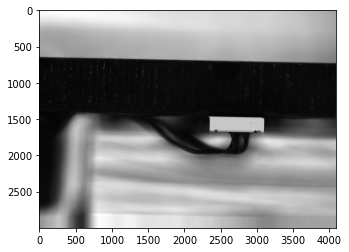

In [92]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/sample_data/1_0_1184.png')
imgplot = plt.imshow(img)
plt.show()

In [96]:
img = cv.imread('/content/sample_data/1_0_1184.png')

In [109]:
pts = np.array(pair_array, np.int32)

In [ ]:
pts

In [117]:
img_poly = cv.fillPoly(img,[pts],(255))

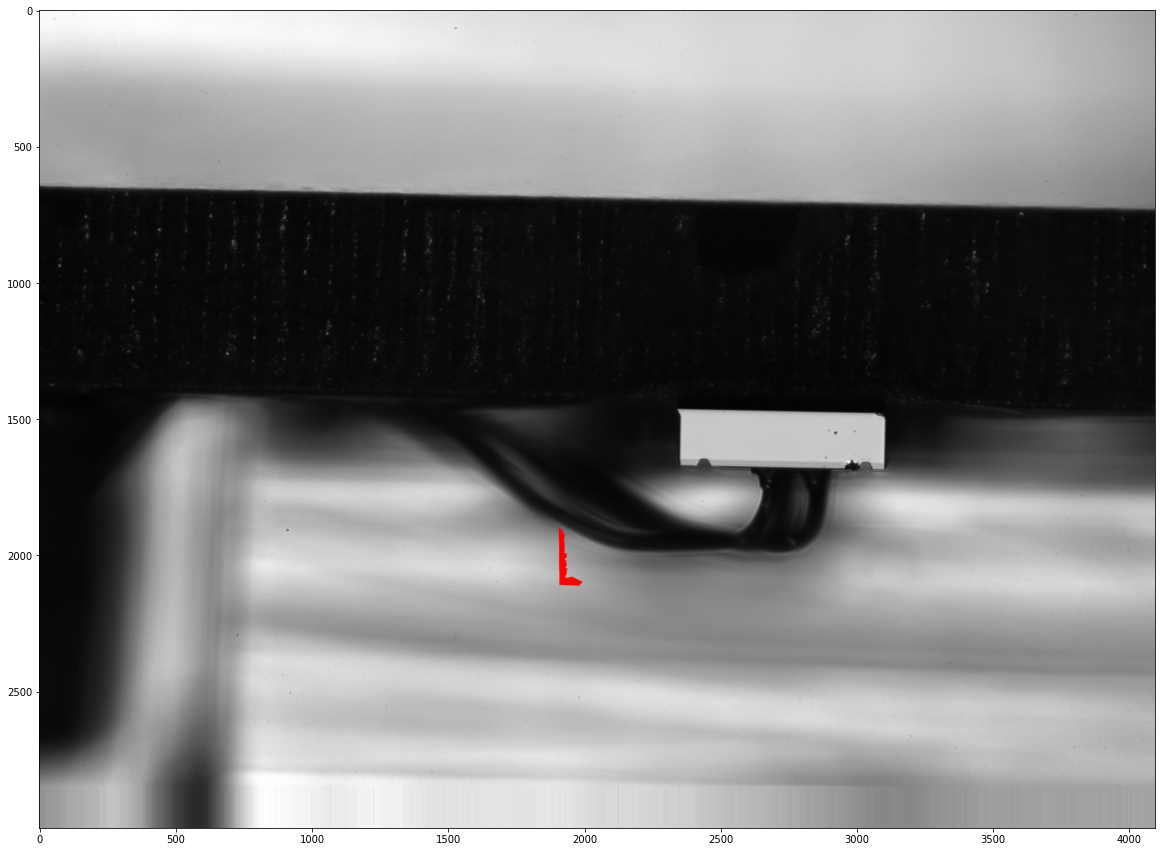

In [118]:
plt.figure(figsize = (20, 20))
imgplot = plt.imshow(img_poly)
plt.show()

In [85]:
pair_array[0]

[1908.6233507592715, 1897.8715459297969]

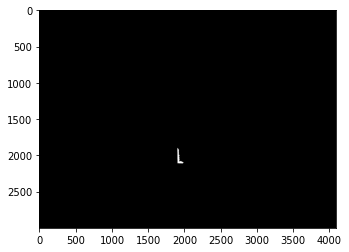

In [121]:
mask = np.zeros(img.shape,np.uint8)
vertices = np.array(img_poly)
mask=cv.fillPoly(mask, pts = [pts], color =(255,255,255))
cv.imwrite('workplace.png',mask)
plt.imshow(mask,cmap='gray')

In [123]:
mask

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [125]:
mask.astype(bool)

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,